#### Q1. What is Gradient Boosting Regression?


* Gradient Boosting Regression (GBR) is a machine learning algorithm that belongs to the family of boosting algorithms. It is a supervised learning algorithm used for both regression and classification problems.

* In Gradient Boosting Regression (GBR), a decision tree is fitted to the data in a step-wise manner, with each new tree attempting to correct the errors made by the previous tree. The prediction of the ensemble model is obtained by summing the predictions of all the individual trees.

* The "gradient" in gradient boosting refers to the use of the gradient descent optimization algorithm to minimize the loss function (e.g., mean squared error) of the model. At each step, the gradient of the loss function with respect to the prediction is computed, and the tree is fitted to the negative gradient, which corresponds to the direction of steepest descent.

* GBR is a powerful algorithm that can handle a large number of features and nonlinear relationships between the features and the target variable. However, it can be prone to overfitting if the model is too complex or if the data is noisy. Therefore, it is important to tune the hyperparameters of the model (e.g., the number of trees, the learning rate, the maximum depth of the trees) to achieve the best performance on the validation set.

# ---------------------------------------------------------

#### Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a simple regression problem as an example and train the model on a small dataset. Evaluate the model's performance using metrics such as mean squared error and R-squared.


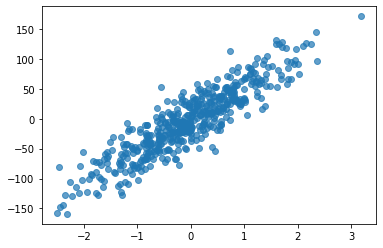

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

X,Y = make_regression(n_samples=500,n_features=1,n_informative=1, noise=25,random_state=23)
plt.scatter(X,Y,alpha=0.7)

In [2]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=42) 

In [3]:
n_estimators = 1000
learning_rate = 0.001
# Initialize ensemble predictions to the mean of the target variable
ensemble_preds = np.full_like(ytrain, np.mean(ytrain))

In [4]:
# Train the model using gradient boosting
from sklearn.tree import DecisionTreeRegressor
stubs = []
for i in range(n_estimators):
    # Compute the residual between the current predictions and the true target values
    residuals = ytrain - ensemble_preds
    
    # Fit a regression tree to the residuals
    tree = DecisionTreeRegressor(max_depth=3)
    tree.fit(xtrain, residuals)

    stubs.append(tree)
    
    # Update the ensemble predictions with the current tree's predictions
    ensemble_preds += learning_rate * tree.predict(xtrain)

In [5]:
# Evaluate the model on the test set
y_pred = np.full_like(ytest, np.mean(ytrain))
for i in range(n_estimators):
    y_pred += learning_rate * stubs[i].predict(xtest)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)
print("Mean squared error:", mse)
print("R-squared:", r2)

Mean squared error: 1032.4135299652953
R-squared: 0.65745766069392


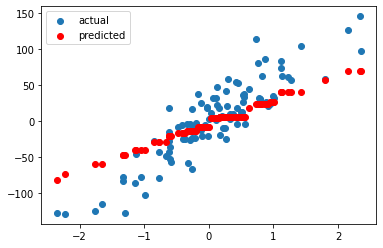

In [6]:
plt.scatter(xtest,ytest,label='actual')
plt.scatter(xtest, y_pred,c='r',label='predicted')
plt.legend()
plt.show()

# ---------------------------------------------------------

#### Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to optimise the performance of the model. Use grid search or random search to find the best hyperparameters


In [7]:
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
X, Y = make_regression(n_samples=1000, n_features=5, n_informative=3, noise=10, random_state=23)

In [8]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5]
}

In [9]:
# Create a gradient boosting regressor object
gbm = GradientBoostingRegressor()

# Create a grid search object
grid_search = GridSearchCV(gbm, param_grid=param_grid, 
                           scoring='neg_mean_squared_error',cv=5, n_jobs=-1)

# Fit the grid search object to the data
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [10]:
# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best score:  -655.8223197879881


In [11]:
# Evaluate the performance of the model on the test set
y_pred = grid_search.predict(xtest)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)
print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Mean squared error:  594.4662131974534
R-squared score:  0.802763290680695


# ---------------------------------------------------------

#### Q4. What is a weak learner in Gradient Boosting?



* In Gradient Boosting, a weak learner is a machine learning algorithm that performs only slightly better than random guessing, but is still able to learn from the training data. The concept of a weak learner in Gradient Boosting algorithm, combines many weak learners to create a strong learner.


* In Gradient Boosting, each weak learner is typically a decision tree with a shallow depth, often referred to as a decision stump. During training, the algorithm fits the weak learner to the data, and then adjusts the weights of the training examples to focus on the examples that were poorly predicted by the previous weak learner. The algorithm then adds the new weak learner to the ensemble, and repeats this process many times to gradually improve the model's accuracy.


* The strength of the Gradient Boosting algorithm lies in its ability to combine many weak learners to create a strong learner. By adding many weak learners and focusing on the examples that are difficult to predict, the algorithm is able to learn complex relationships in the data and create a highly accurate model

# ---------------------------------------------------------

#### Q5. What is the intuition behind the Gradient Boosting algorithm?


* The intuition behind the Gradient Boosting algorithm is to iteratively improve the accuracy of a model by combining many weak learners to create a strong learner.


* The algorithm starts by fitting a weak learner to the training data. This initial model may not be very accurate, but it provides a starting point for the algorithm to build on. The algorithm then evaluates the errors made by this model, and focuses on the examples that were poorly predicted. The next weak learner is then trained to focus on these difficult examples, in an attempt to correct the errors made by the previous model.


* This process of adding a new weak learner and adjusting the weights of the examples is repeated many times, with each new weak learner improving on the errors made by the previous model. The final model is then created by combining all of the weak learners into a single ensemble model.


* The key idea behind Gradient Boosting is that each weak learner focuses on the examples that are difficult to predict, and by combining many of these weak learners, the algorithm is able to learn complex relationships in the data and create a highly accurate model. The "gradient" in the name comes from the fact that the algorithm uses the gradient of the loss function to determine how to adjust the weights of the training examples at each step, in order to focus on the examples that are difficult to predict.

# ---------------------------------------------------------

#### Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?


* The Gradient Boosting algorithm builds an ensemble of weak learners by iteratively adding new weak learners to the ensemble and adjusting the weights of the training examples to focus on the examples that are difficult to predict. This algorithm works as follows:

    * **Initialize the model:** The algorithm starts by initializing the model with a single weak learner, such as a decision tree with a shallow depth.
    * **Fit the model:** The weak learner is fit to the training data, and the model makes predictions on the training set.
    * **Compute the residuals:** The algorithm computes the difference between the predicted values and the true values on the training set. These differences are called the residuals.
    * **Update the weights:** The weights of the training examples are adjusted based on the residuals. Examples, or simply features, that were poorly predicted by the previous model are given more weight, while examples that were well predicted are given less weight.
    * **Fit a new weak learner:** A new weak learner is fit to the training data, with the weights of the examples, or simply features, that were adjusted to focus on the examples that are difficult to predict.
    * **Add the new weak learner to the ensemble:** The new weak learner is added to the ensemble of weak learners.
    * **Repeat:** Steps 2-6 are repeated many times, with each new weak learner focusing on the examples that are difficult to predict, and the weights of the training examples adjusted to emphasize these examples.
    * **Combine the weak learners:** The final model is created by combining all of the weak learners in the ensemble. The predictions of the weak learners are weighted according to their performance on the training set, and the weighted sum of the predictions is used to make the final prediction.
* By iteratively adding new weak learners and adjusting the weights of the training examples, the Gradient Boosting algorithm is able to create a highly accurate ensemble model that can learn complex relationships in the data.

# ---------------------------------------------------------

#### Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting algorithm?

* The mathematical intuition behind the Gradient Boosting algorithm can be broken down into several key steps:

    * **Define the Loss Function:** The first step is to define a loss function that measures the difference between the predicted values and the true values. Common loss functions for regression problems include the mean squared error (MSE) and the mean absolute error (MAE). For classification problems, common loss functions include the binary cross-entropy loss and the multi-class cross-entropy loss.
    * **Fit the Initial Model:** The algorithm starts by fitting an initial model to the data, such as a decision tree with a shallow depth. This initial model may not be very accurate, but it provides a starting point for creating an algorithm.
    * **Compute the Residuals:** The algorithm computes the difference between the predicted values and the true values on the training set. These differences are called the residuals.
    * **Fit a New Weak Learner:** The next step is to fit a new weak learner to the residuals. The new weak learner should focus on the examples that were poorly predicted by the previous model, in an attempt to correct the errors made by the previous model. The most common choice for a weak learner in Gradient Boosting is a decision tree with a shallow depth.
    * **Update the Model:** The predictions of the new weak learner are added to the predictions of the previous model, and the model is updated to minimize the loss function. This is typically done using a gradient descent algorithm, where the gradient of the loss function is used to determine the direction and magnitude of the update.
    * **Repeat:** Steps 3-5 are repeated many times, with each new weak learner focusing on the examples that are difficult to predict, and the model updated to minimize the loss function.
    * **Combine the Weak Learners:** The final model is created by combining all of the weak learners in the ensemble. The predictions of the weak learners are weighted according to their performance on the training set, and the weighted sum of the predictions is used to make the final prediction.
* By iteratively adding new weak learners and adjusting the model to minimize the loss function, the Gradient Boosting algorithm is able to create a highly accurate ensemble model that can learn complex relationships in the data. The key insight is that each new weak learner focuses on the examples that are difficult to predict, and by combining many of these weak learners, the algorithm is able to improve the accuracy of the model over time.

# ---------------------------------------------------------